In [1]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - QObs

#### Benchmarking dataset information
The streamflow dataset was supplied by various agencies across Australia to the Bureau of Meteorology. The flow volumes used (in mm) are the daily aggregated values at the gauges divided by catchment area.
<br>
##### Source:
Zhang, Y.Q., Viney, N., Frost, A., Oke, A., Brooks, M., Chen, Y. and Campbell, N., 2013. Collation of streamflow and catchment attribute dataset for 780 unregulated Australian catchments, CSIRO: Water for a Healthy Country National Research Flagship.

This notebooks goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Catchments to be benchmarked<br>
 2.2 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
7. Statistics plotting
8. Exercises


### 1. Import required libraries

In [2]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

from awrams.utils import config_manager
    
sys_profile = config_manager.get_system_profile().get_settings()
TRAINING_DATA_PATH = sys_profile['DATA_PATHS']['TRAINING_DATA']

### 2.  Set up benchmarking configuration
Compares against observed streamflow <br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1 Catchments to be benchmarked

In [3]:
data_path = TRAINING_DATA_PATH + '/benchmarking/'

catchment_csv = data_path+'/catchment_ids.csv'
id_list=read_id_csv(catchment_csv)

#### 2.2. Observations to use

In [4]:
obs_csv = data_path+ '/runoff/Catchment_Qobs.csv'

### 3.  Create the benchmark object:<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [5]:
q = Benchmark("QObs", "runoff")

# Specify benchmarking period
q.period = dt.dates("1981", "30/12/2011")

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
q.load(obs_csv, id_list=id_list)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:39: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.monthly = self.obs.data.resample(rule='m', how=self.aggr_how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:40: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.annual = self.obs.data.resample(rule='A', how=self.aggr_how)


In [6]:
q.site_ref_type

'ID'

### 4. Add models to be benchmarked

This step processes the data and calculates all the statistics [can take a while]

In [7]:
# Reading data from pre-processed csv

csv_data = data_path+'/runoff/awral_qtot_avg.csv'
q.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:151: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  _df = cur_data[valid_idx].resample(rule='m', how=np.mean).dropna()
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:152: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  monthly_data = pd.DataFrame(_df,index=_df.index|valid_idx).fillna(method='bfill').resample(rule='m', how=np.sum)[col_name]
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:181: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  out_dct[col] = ts.resample(annual_rule, how)


In [8]:
## Sample code here to extract data on any catchment in the default catchment dataset
## A similar approach would work with a user defined catchment shapefile.

# import pandas as pd
# from awrams.utils import extents
# from awrams.utils.io.data_mapping import SplitFileManager
# from awrams.utils.processing.extract import extract_from_filemanager
# from awrams.utils.gis import ShapefileDB, CATCHMENT_SHAPEFILE

# catchments = ShapefileDB(CATCHMENT_SHAPEFILE)

# var_name = 'qtot_avg'
# model_data_path = '/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_awraprod1/'
# period = dt.dates('jul 2010 - jun 2011')

# pattern = data_path + '/%s*' % var_name
# sfm = SplitFileManager.open_existing(model_data_path,pattern,var_name)
# georef = sfm.get_extent()
# extent_map = {}
    
# for site in q.sites:
#     extent_map[site] = catchments.get_extent_by_field('StationID',site.zfill(6),georef)

# df = extract_from_filemanager(sfm, extent_map, period)
# df

# df.to_csv('./for_streamflow/'+ var_name+ '.csv' 

In [9]:
csv_data = data_path+'/runoff/AWRAMSI_v5QES_AWRAL_qtot_avg.csv'
q.add_model("AWRAMSI_v5_0_AWRAL", data_csv=csv_data)

#### 4.1 Show list of loaded or selected models
List of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [10]:
q.benchmark.selection

['AWRAMSI_v4_0_AWRAL', 'AWRAMSI_v5_0_AWRAL']

In [11]:
#q.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
#q.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

### 5. View the statistics tables
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [12]:
q.benchmark.stat_percentiles('grand_f', freq='monthly')

,grand_f
AWRAMSI_v4_0_AWRAL,0.079414
AWRAMSI_v5_0_AWRAL,0.088319


In [13]:
q.benchmark.stat_percentiles('grand_f', freq='daily')

,grand_f
AWRAMSI_v4_0_AWRAL,0.015785
AWRAMSI_v5_0_AWRAL,0.019879


In [14]:
q.benchmark.stat_percentiles('nse', freq='m')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.271805,0.382997,0.628121,0.677263,0.834034,0.898544,0.914612
AWRAMSI_v5_0_AWRAL,0.254702,0.359953,0.598745,0.743987,0.793243,0.856380,0.859365


In [15]:
q.benchmark.stat_percentiles('bias_relative')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-0.534929,-0.507981,-0.456540,-0.322629,-0.096231,1.389183,1.944231
AWRAMSI_v5_0_AWRAL,-0.555198,-0.515697,-0.424333,-0.359837,-0.094246,1.104672,1.626002


In [16]:
q.benchmark.stat_percentiles('pearsons_r',freq='d')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.605472,0.676093,0.82781,0.857553,0.908226,0.934009,0.934931
AWRAMSI_v5_0_AWRAL,0.580846,0.659163,0.78168,0.809522,0.857483,0.922183,0.952413


In [17]:
q.benchmark.stat_percentiles('mean',freq='d')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.027104,0.253661,1.790567,3.053136,3.642913,5.440798,5.887065
AWRAMSI_v5_0_AWRAL,0.024142,0.216069,1.935748,2.921725,3.489697,5.311106,5.708850


In [18]:
q.benchmark.data_percentiles(freq='d')

,0%,5%,25%,50%,75%,95%,100%
QObs,0.007468,0.156366,2.128985,4.556024,5.616697,8.773907,9.399966
AWRAMSI_v4_0_AWRAL,0.027104,0.253661,1.790567,3.053136,3.642913,5.440798,5.887065
AWRAMSI_v5_0_AWRAL,0.024142,0.216069,1.935748,2.921725,3.489697,5.311106,5.708850


In [19]:
q.benchmark.data_percentiles(freq='m')

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:369: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  obs_series = self.obs.data.resample(rule=pd_tf, how=self.aggr_how).mean().values.flatten()


,0%,5%,25%,50%,75%,95%,100%
QObs,0.223122,4.668173,63.469236,135.672628,170.398645,257.805582,277.203081
AWRAMSI_v4_0_AWRAL,0.839098,7.674550,54.521343,92.887510,110.854524,165.543277,179.176569
AWRAMSI_v5_0_AWRAL,0.748404,6.542429,57.687874,88.959723,106.023203,161.557705,173.704165


In [20]:
q.benchmark.data_percentiles(freq='y')
## Overall statistics pertaining to the data can be added. The  'all' line is the average of the set.

,0%,5%,25%,50%,75%,95%,100%
QObs,2.454340,52.373781,675.081869,1573.802483,2017.300086,2877.439620,3169.355227
AWRAMSI_v4_0_AWRAL,10.051980,85.375847,610.631375,1069.948122,1205.007902,1863.253305,2000.805022
AWRAMSI_v5_0_AWRAL,8.989923,72.814330,634.958145,1011.175521,1153.009749,1817.349370,1939.696506


In [21]:
q.benchmark.stat(statistic='bias')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
4508,0.554101,0.463406
105001,6.410586,3.716324
107002,-8.352970,-6.002559
108003,-78.031379,-78.015258
109001,-127.505749,-132.337070
111101,-106.639120,-112.111525
112102,-15.449193,-17.204518
113004,-44.833946,-50.004556
116008,-47.877702,-43.451334
all,-52.023813,-53.756411


In [22]:
mean_flow = q.benchmark.stat() # default stat is mean monthly value, which also adds the obs to the table
mean_flow

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL,QObs
4508,0.839098,0.748404,0.284997
105001,17.927729,15.233467,11.517143
107002,55.337463,57.687874,63.690433
108003,92.887510,92.903631,170.918889
109001,110.854524,106.023203,238.360273
111101,179.176569,173.704165,285.815689
112102,145.093339,143.338014,160.542532
113004,94.130333,88.959723,138.964279
116008,54.521343,58.947710,102.399044
all,92.298593,90.565995,144.322406


In [23]:
# mean_flow.to_csv('./mean_flow.csv')

### 6. View the statistic plots [time series, regression, cumulative exceedance]

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments


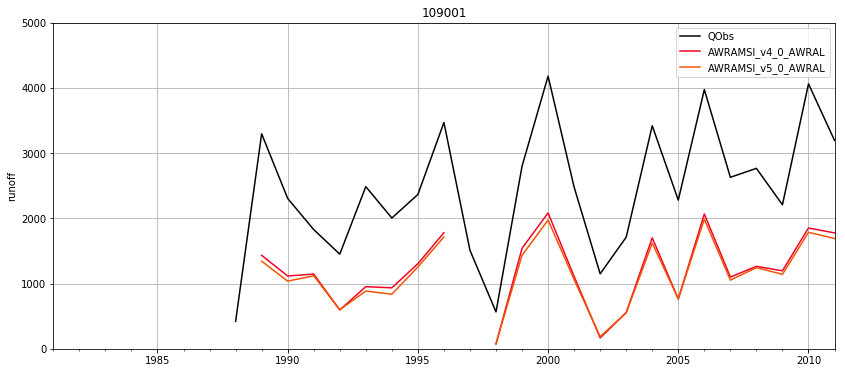

In [24]:
## THRERE IS A BUG HERE WHICH WILL MAKE THIS NOT WORK IF YOU'VE DONE A RECENT GIT PULL

p = q.benchmark.plot_timeseries('109001',ylim=[0,5000], freq = 'y')

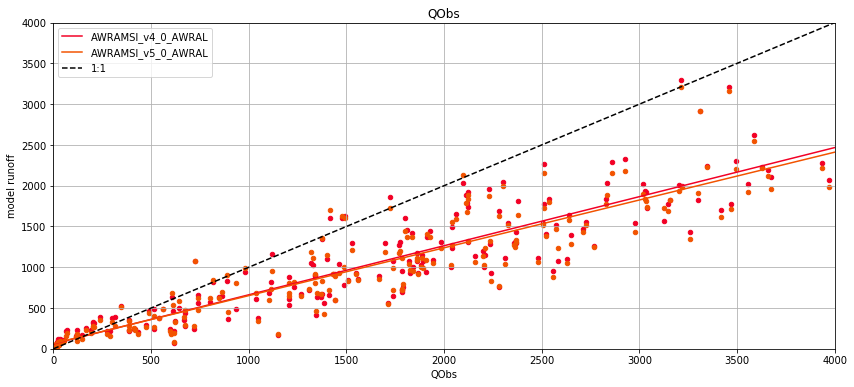

In [25]:
p = q.benchmark.plot_regression(title="QObs", freq='y', xlim=[0,4000],ylim=[0,4000])

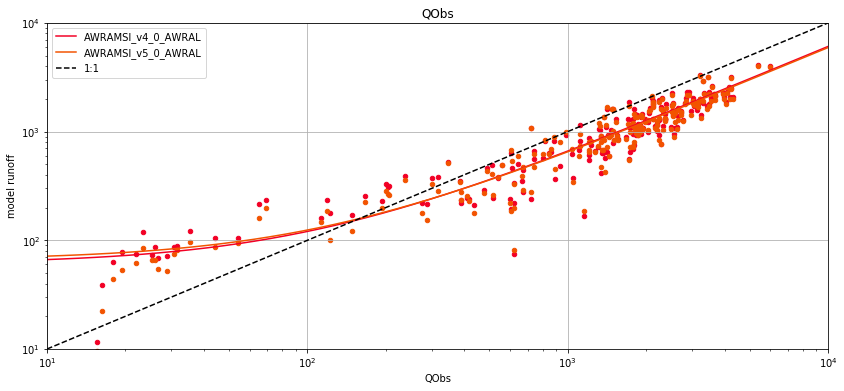

In [26]:
p = q.benchmark.plot_regression(title="QObs", freq='y', yscale='log', xscale='log', ylim=[10,10000], xlim=[10,10000])

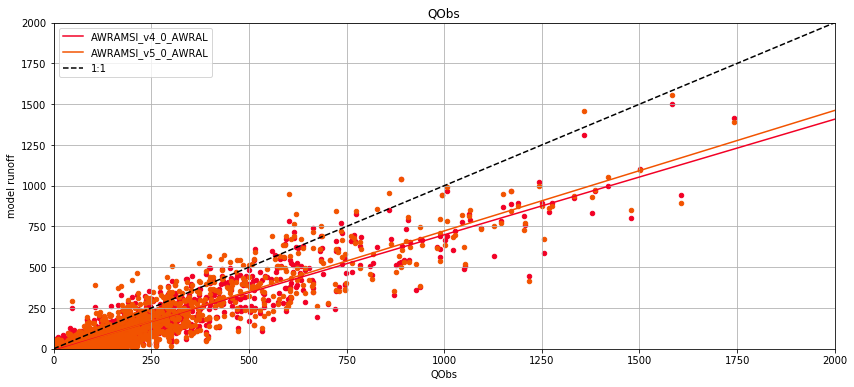

In [27]:
p = q.benchmark.plot_regression(title="QObs", freq='m', xlim=[0,2000],ylim=[0,2000])

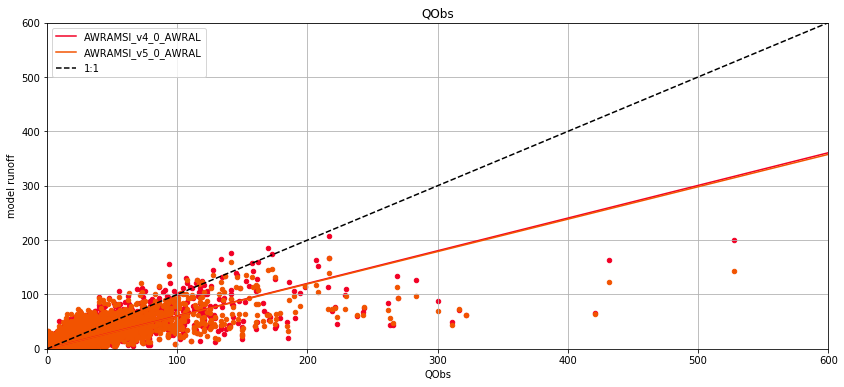

In [28]:
p = q.benchmark.plot_regression(title="QObs", freq='d', xlim=[0,600],ylim=[0,600])

### 7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

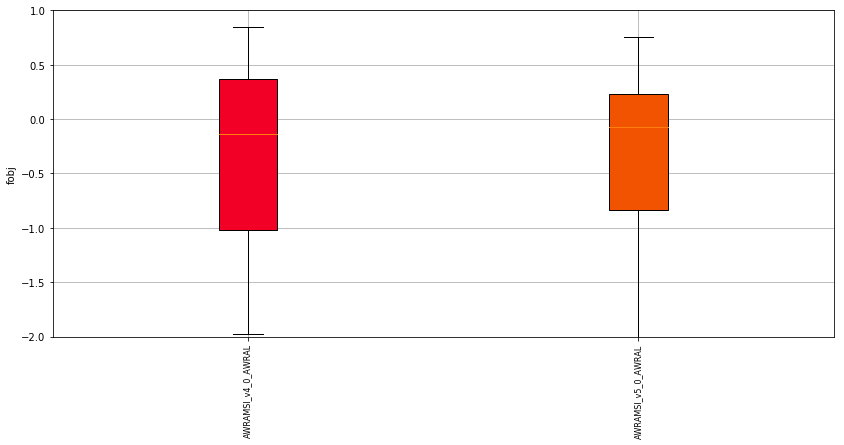

In [29]:
p = q.benchmark.plot_box('fobj', freq='d', ylim=[-2,1]) #fobj is viney function used in calibration

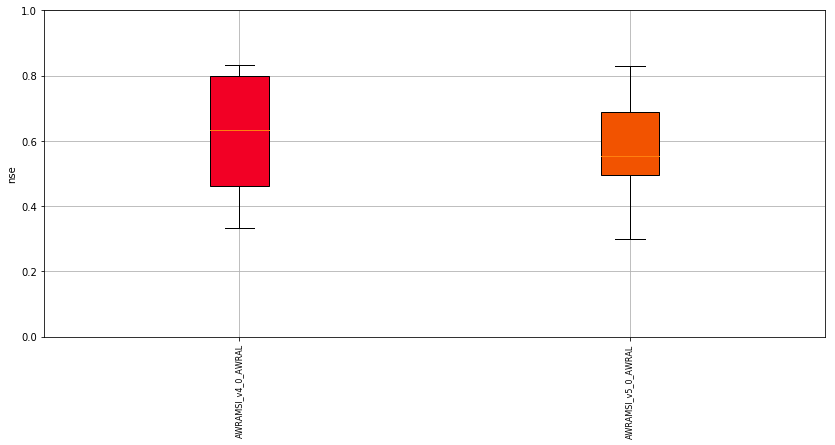

In [30]:
p = q.benchmark.plot_box('nse', freq='d', ylim=[0,1])

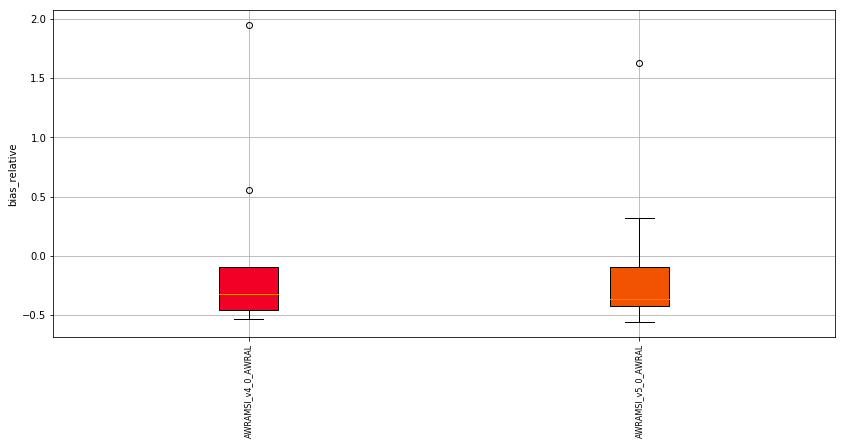

In [31]:
p = q.benchmark.plot_box('bias_relative', freq='m')

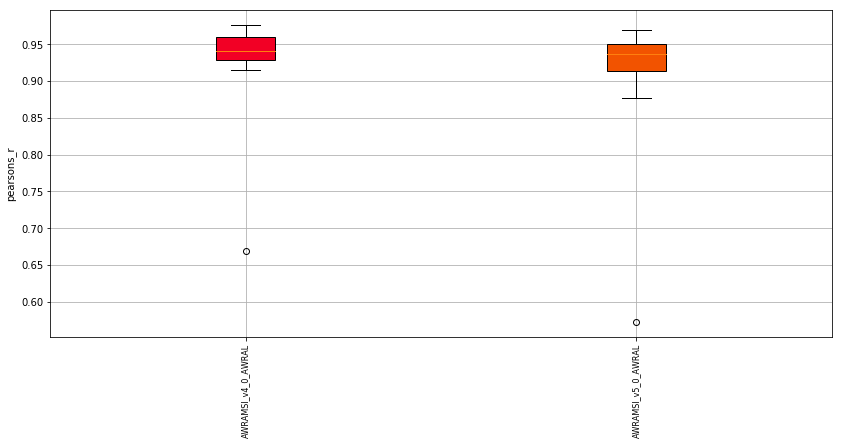

In [32]:
p = q.benchmark.plot_box('pearsons_r', freq='m')

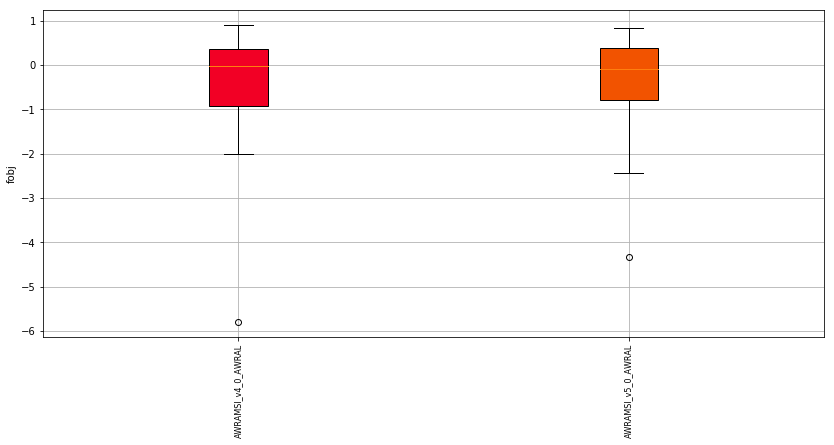

In [33]:
p = q.benchmark.plot_box('fobj', freq='m')

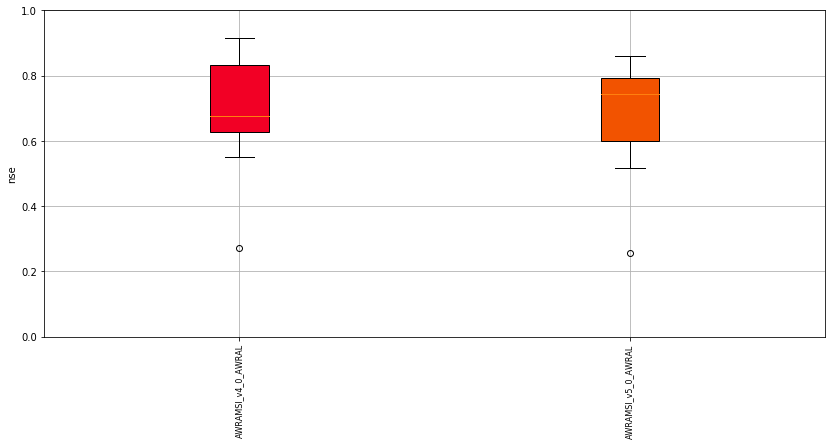

In [34]:
p = q.benchmark.plot_box('nse', freq='m', ylim=[0,1])

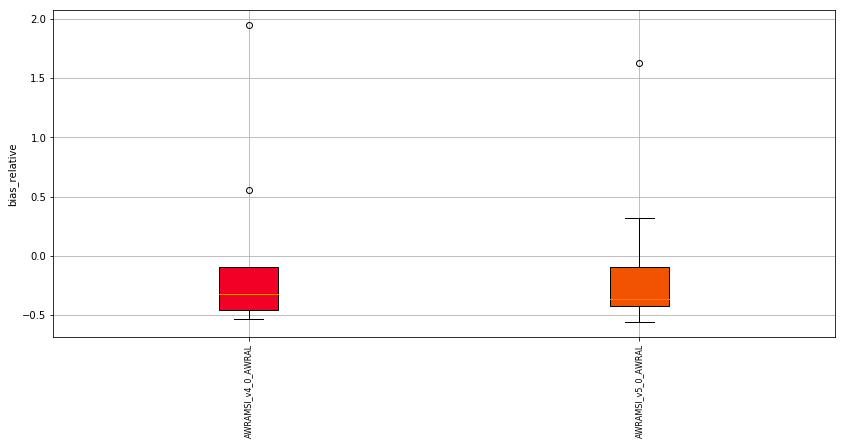

In [35]:
p = q.benchmark.plot_box('bias_relative', freq='m')

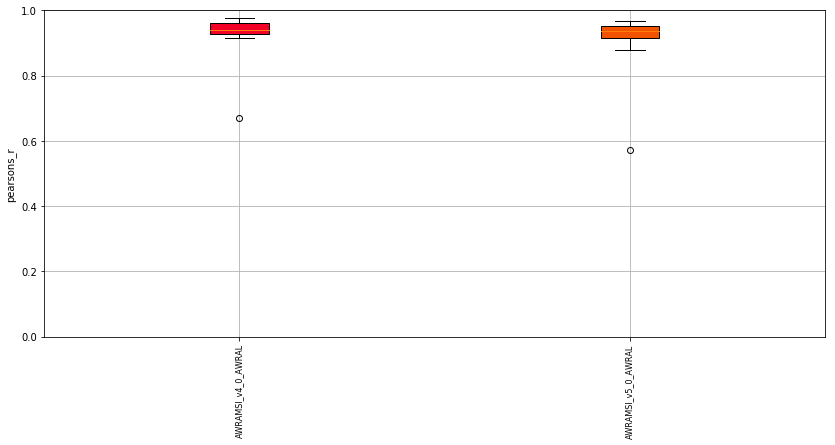

In [36]:
p = q.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])

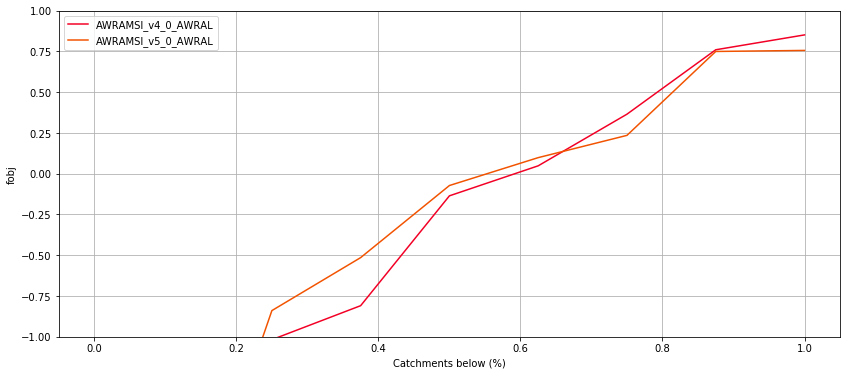

In [37]:
p = q.benchmark.plot_cdf('fobj',freq='d', ylim=[-1,1])

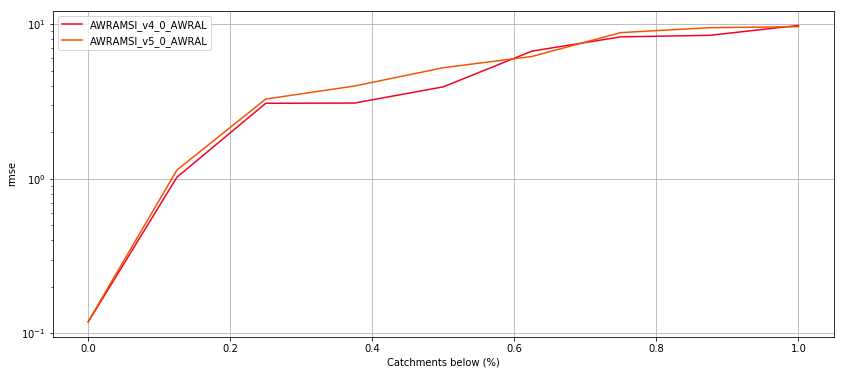

In [38]:
p = q.benchmark.plot_cdf('rmse',freq='d', yscale='log')

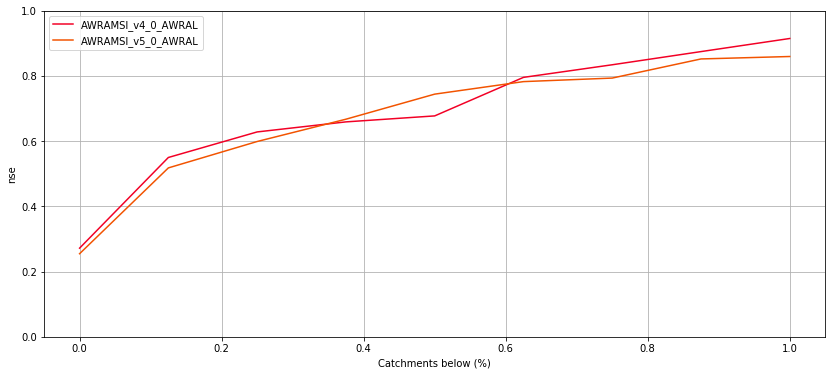

In [39]:
p = q.benchmark.plot_cdf('nse',freq='m', ylim=[0,1])

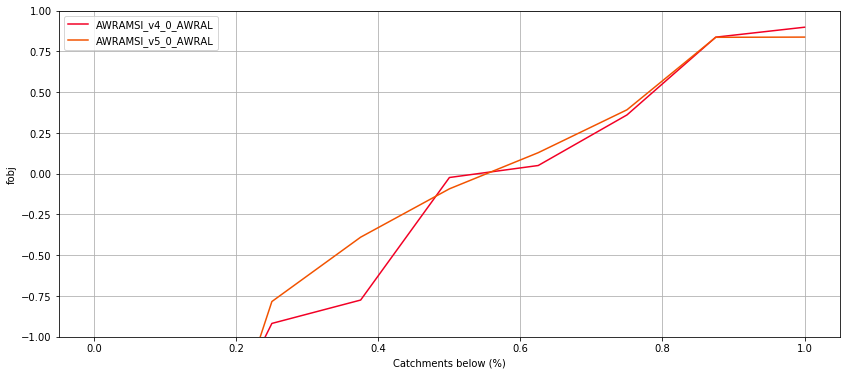

In [40]:
p = q.benchmark.plot_cdf('fobj',freq='m', ylim=[-1,1])

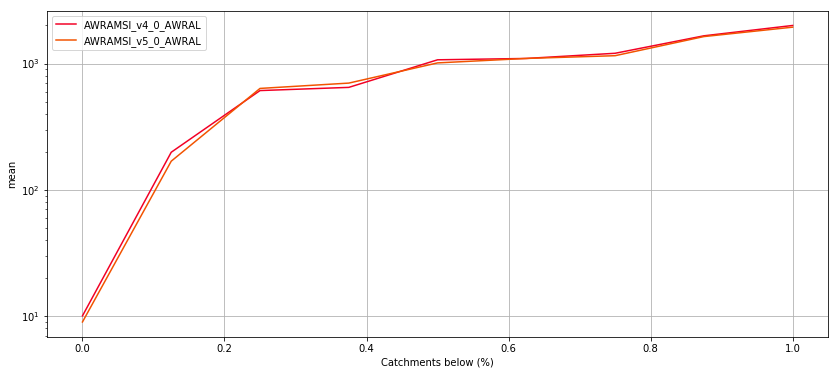

In [41]:
p = q.benchmark.plot_cdf('mean', freq='y', yscale='log')

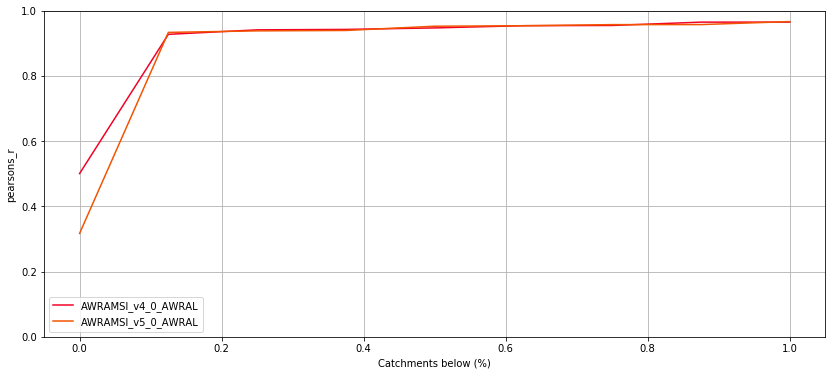

In [42]:
p = q.benchmark.plot_cdf('pearsons_r', freq='y', ylim=[0,1])

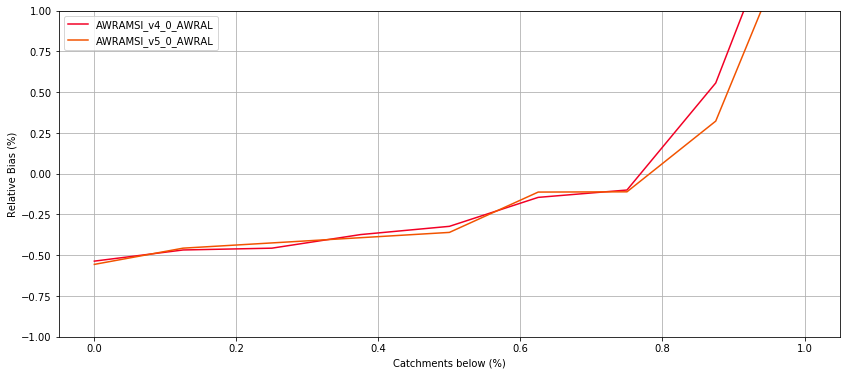

In [43]:
p = q.benchmark.plot_cdf('bias_relative',freq='y', ylabel='Relative Bias (%)', ylim=[-1,1])

### 7. Exercise